In [1]:
from P2_module import *
import matplotlib.pyplot as plt
import qutip as qt
import math
from scipy.integrate import simpson

# Part 1
Show that the operators $\hat x^2$ and $\hat x^4$ have the following matrix elements in the harmonic oscillator basis:
$$
    \begin{align}
    \langle n|\hat x^2|m\rangle 
    &=(n+1/2)\delta_{nm} + \tfrac{1}{2}\sqrt{(n+1)(n+2)}\,\delta_{n,m-2} + 
\tfrac{1}{2}\sqrt{(n-1)n\,}\,\delta_{n,m+2} \\
    \langle n|\hat x^4|m\rangle 
    &= \tfrac{1}{4}\!\left(6n^2 + 6n + 3\right)\!\delta_{nm}
+ \sqrt{(n+1)(n+2)}\left(n+\tfrac{3}{2}\right)\!\delta_{n,m-2}\;+ \nonumber\\
& + \sqrt{(n-1)n\,}\left(n-\tfrac{1}{2}\right)\!\delta_{n,m+2} +
\tfrac{1}{4}\sqrt{(n+1)(n+2)(n+3)(n+4)}\,\delta_{n,m-4}\;+ \nonumber\\
& + \tfrac{1}{4}\sqrt{(n-3)(n-2)(n-1)n\,}\,\delta_{n,m+4}.
\end{align}$$

## Matrix elements for $\hat{x^2}$

The position operator $\hat{x}$ in terms of the annihilation operator $\hat{a}$ and creation operator $\hat{a}^\dagger$ is defined as:

$$
\hat{x} = \sqrt{\frac{1}{2}} (\hat{a} + \hat{a}^\dagger)
$$

Expanding the square of the position operator, we have:

$$
\hat{x}^2 = \left(\sqrt{\frac{1}{2}} (\hat{a} + \hat{a}^\dagger)\right)^2 = \frac{1}{2} (\hat{a}^2 + \hat{a}\hat{a}^\dagger + \hat{a}^\dagger\hat{a} + (\hat{a}^\dagger)^2)
$$

Using the commutation relation $[\hat{a}, \hat{a}^\dagger] = 1$, which implies $\hat{a}^\dagger\hat{a} = \hat{a}\hat{a}^\dagger - 1$, we can simplify:

$$
\hat{x}^2 = \frac{1}{2} (\hat{a}^2 + 2\hat{a}\hat{a}^\dagger - 1 + (\hat{a}^\dagger)^2)
$$

When we apply $\hat{x}^2 |n\rangle$, we see that 

$$
\hat{x}^2 |n\rangle = \frac{1}{2} \left(\sqrt{n(n-1)} |n-2\rangle + 2(n+1) |n\rangle + \sqrt{(n+1)(n+2)} |n+2\rangle\right)
$$


This implies that only $|n\rangle$ can only interact with $|n+2\rangle$, $|n-2\rangle$ and $|n\rangle$. All the other elements will yield 0 due to the orthogonality nature of the fock states. In addition, since $\hat{x}^2$ is hermitian and real (commutation relation), we can further explore the symmetry of the matrix element. Therefore, We can reduce the program to calculate the following element:

$$
\langle n|\hat{x}^2|n \rangle = \frac{1}{2} (2n + 1) = n + \frac{1}{2}
$$
$$
\langle n|\hat{x}^2|n-2 \rangle = \langle n-2|\hat{x}^2|n \rangle = \frac{1}{2} \sqrt{n(n-1)}
$$
$$
\langle n|\hat{x}^2|n+2 \rangle = \langle n+2|\hat{x}^2|n \rangle = \frac{1}{2} \sqrt{(n+1)(n+2)}
$$

Therefore, the matrix elements are:

$$
\langle n|\hat{x}^2|m\rangle = (n+\frac{1}{2})\delta_{nm} + \frac{1}{2}\sqrt{(n+1)(n+2)}\,\delta_{n,m-2} + \frac{1}{2}\sqrt{(n-1)n}\,\delta_{n,m+2}
$$


## Matrix Elements for $\hat{x}^4$ 

The expression will be cumbersome to derive analytically. Therefore, we will numerically prove that the expression is correct.

In [2]:
def create_x4_matrix(size):
    # Initialize the matrix with zeros
    x4 = np.zeros((size, size))

    for n in range(size):
        # Diagonal elements (n == m)
        x4[n, n] = (6*n**2 + 6*n + 3) / 4

        # Off-diagonal elements for n, m-2 and n, m+2
        if n + 2 < size:
            x4[n, n+2] = np.sqrt((n+1)*(n+2)) * (n + 3/2)
            x4[n+2, n] = np.sqrt((n+1)*(n+2)) * (n + 3/2)

        # Off-diagonal elements for n, m-4 and n, m+4
        if n + 4 < size:
            x4[n, n+4] = 0.25 * np.sqrt((n+1)*(n+2)*(n+3)*(n+4))
            x4[n+4, n] = 0.25 * np.sqrt((n+1)*(n+2)*(n+3)*(n+4))

    return x4

In [3]:
N = 5

a = qt.destroy(N)
a_dag = a.dag()

x = (a + a_dag) / (2**0.5)

x_4_qt = x**4
x_4_qt = x_4_qt.full()

x_4_analytic = create_x4_matrix(N)

np.isclose(x_4_qt, x_4_analytic)

array([[ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True, False],
       [ True,  True,  True, False,  True],
       [ True,  True, False,  True, False]])

In [4]:
N = 10

a = qt.destroy(N)
a_dag = a.dag()

x = (a + a_dag) / (2**0.5)

x_4_qt = x**4
x_4_qt = x_4_qt.full()

x_4_analytic = create_x4_matrix(N)

np.isclose(x_4_qt, x_4_analytic)

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
        False],
       [ True,  True,  True,  True,  True,  True,  True,  True, False,
         True],
       [ True,  True,  True,  True,  True,  True,  True, False,  True,
        False]])

As we can see from $N=5$ and $N=10$ case, the analytic expression is correct. The reason that we are getting 4 False elements in the comparison is because qutip will truncate the infinite dimension hilbert space into finite dimension hilbert space, and the $\hat{a^{\dag}}$ operator will not have the proper behaviour toward the end. Meanwhile, the analytic expression assumes infinite hilbert space, thus resulting the difference. But as we can see, the number of false term does not grow as N increases, which implicitly also prove the point that it is only due to the truncation of hilbert space and that the analytic expression is correct and aligns with qutip for all other cases.

# Part 2
Solve the anharmonic oscillator eigenvalue problem written in the harmonic oscillator basis for at least the first four energy levels. Note that the function `hermval` from NumPy offers an easy solution to compute the eigenfunctions $\psi_n(x)$ from the eigenvectors of the matrix representation of the hamiltonian. 

In [5]:
def compare_complex_vectors(v1, v2, tolerance=1e-4):
    if np.allclose(v1, v2, atol = tolerance):
        return True
    for i in range(v1.size):
        if np.abs(v2[i]) > 1e-3:
            ratio = v1[i] / v2[i]
            v1 = v1 / ratio
            break
    return np.allclose(v1, v2, atol=tolerance, rtol=tolerance)

In [6]:
# Parameters
omega = 1.0  
h_bar = 1
N = 10    
lamb = 0.1
m = 1

# Operators
a = qt.destroy(N)        
a_dag = a.dag()          

# x^4 operator
x4 = qt.Qobj(create_x4_matrix(N))

# Hamiltonian
store = []


H = omega * h_bar * (a_dag * a + 0.5)
H_aharmonic = H + lamb*x4
H_aharmonic_np = H_aharmonic.full()

d, U = hermitian_eigensystem(H_aharmonic_np, 1e-8)
d_qutip, U_qutip = H_aharmonic.eigenstates()
U_list = [U.full() for U in U_qutip]
U_qutip = np.hstack(U_list)

Check if eigenvalues align between my eigensolver and qutip

In [7]:
print(np.allclose(d, d_qutip))

True


Check if eigenvectors align between my eigensolver and qutip

In [8]:
flag =  True
U = np.round(U, 4)
U_qutip = np.round(U_qutip, 4)
for i in range(d.size):
    if not compare_complex_vectors(U[:,i], U_qutip[:,i]):
        flag = False
print(flag)

True


# Part 3
Plot the first four energy  levels $E_n(\lambda)$ versus $\lambda$ over the range 
$0 \leq \lambda \leq 1$. Plot also the spacings between the 
levels $\Delta E(\lambda) = E_{n+1}(\lambda) - E_n(\lambda)$. Make sure to use a basis 
size $N$ sufficiently larger than the desired number of lowest eigenvalues to ensure convergence of the eigensystem algorithm.

In [9]:
# Parameters
omega = 1.0  
h_bar = 1
N = 30    
lamb = np.linspace(0,1, 100)
m = 1

# Operators
a = qt.destroy(N)        
a_dag = a.dag()          

# Position operator x
x = (a + a_dag) * (h_bar / (2 * m * omega))**0.5

x4 = qt.Qobj(create_x4_matrix(N))

# Hamiltonian
store = []

for i in range(lamb.size):
    H = omega * h_bar * (a_dag * a + 0.5)
    H_aharmonic = H + lamb[i]*x4
    H_aharmonic_np = H_aharmonic.full()

    d, U = hermitian_eigensystem(H_aharmonic_np, 1e-8)
    d_qutip, U_qutip = H_aharmonic.eigenstates()
    U_list = [U.full() for U in U_qutip]
    U_qutip = np.hstack(U_list)
    
    store.append(d[:4])

store = np.array(store)

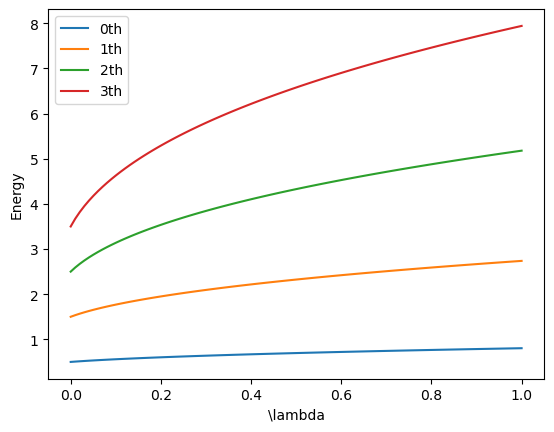

In [10]:
store = np.array(store)
for i in range(4):
    plt.plot(np.array(lamb), store[:,i], label = '{}th'.format(i))

plt.xlabel(r'\lambda')
plt.ylabel('Energy')
plt.legend()
plt.show()

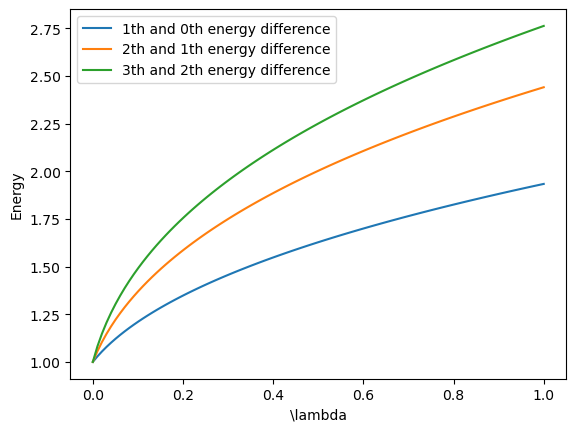

In [11]:
for i in range(3):
    plt.plot(lamb, store[:,i+1] - store[:,i], label = '{}th and {}th energy difference'.format(i+1, i))

plt.xlabel(r'\lambda')
plt.ylabel('Energy')
plt.legend()
plt.show()

# Part 4
Check the convergence of the method with respect to the basis size $N$ by plotting one 
of the lowest (or more) energy eigenvalues $E_n(N)$ for $\lambda = 1$ versus the basis size $N$. 
Alternatively, to demonstrate the convergence more clearly, you can also plot the differences between 
two consecutive estimates $\epsilon_n = E_n(N) - E_n(N\!+\!2)$ versus $N$.

In [12]:
# Parameters
omega = 1.0  
h_bar = 1
N = np.array([i for i in range(5, 50)])
lamb = 1
m = 1
store = []

for i in range(N.size):
    a = qt.destroy(N[i])        
    a_dag = a.dag()          
    x4 = qt.Qobj(create_x4_matrix(N[i]))

    H = omega * h_bar * (a_dag * a + 0.5)
    H_aharmonic = H + lamb*x4
    H_aharmonic_np = H_aharmonic.full()

    d, U = hermitian_eigensystem(H_aharmonic_np, 1e-8)
    d_qutip, U_qutip = H_aharmonic.eigenstates()
    U_list = [U.full() for U in U_qutip]
    U_qutip = np.hstack(U_list)
    store.append(d[:4])

store = np.array(store)

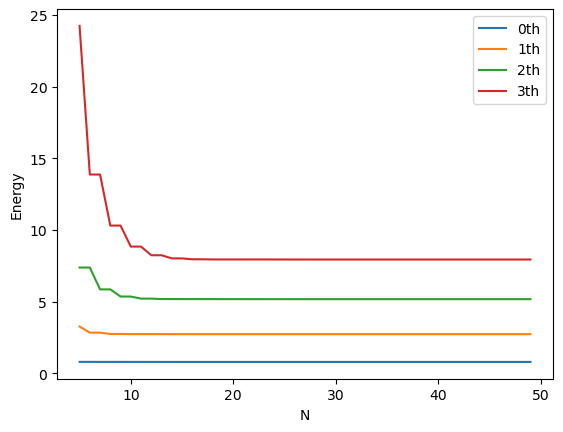

In [13]:
for i in range(4):
    plt.plot(N, store[:,i], label = '{}th'.format(i))

plt.xlabel('N')
plt.ylabel('Energy')
plt.legend()
plt.show()

As we can see, the energy starts to converge after N = 15 for all 4 eigenstates.

# Part 5
Plot and compare the first four eigenfunctions $\psi_n(x)$ for the harmonic oscillator with $\lambda=0$ to 
the eigenfunctions for the anharmonic oscillator with $\lambda=1$.

[]

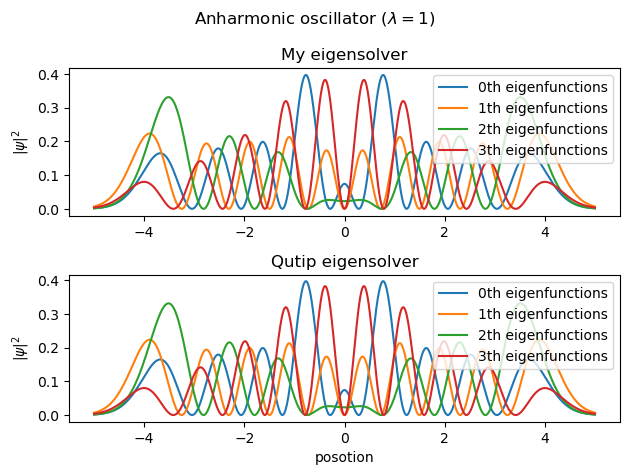

In [14]:
# Parameters
omega = 1.0  
h_bar = 1
N = 10    
lamb = 0.1
m = 1

# Operators
a = qt.destroy(N)        
a_dag = a.dag()          

# x^4 operator
x4 = qt.Qobj(create_x4_matrix(N))

# Hamiltonian
store = []


H = omega * h_bar * (a_dag * a + 0.5)
H_aharmonic = H + lamb*x4
H_aharmonic_np = H_aharmonic.full()

d, U = hermitian_eigensystem(H_aharmonic_np, 1e-8)
d_qutip, U_qutip = H_aharmonic.eigenstates()
U_list = [U.full() for U in U_qutip]
U_qutip = np.hstack(U_list)

fig, ax = plt.subplots(nrows = 2, ncols = 1)

x = np.linspace(-5, 5, 1000)
for i in range(4):
    y = np.polynomial.hermite.hermval(x, U[:,i]) * np.exp(-x**2/2) * (2**i * math.factorial(i) * np.sqrt(np.pi))**(-0.5)
    norm_const = simpson(np.abs(y)**2, dx=x[1]-x[0])
    ax[0].plot(x, np.abs(y)**2/norm_const, label = '{}th eigenfunctions'.format(i))

ax[0].legend()
ax[0].set_title('My eigensolver')
ax[0].set_ylabel(r'|$\psi|^2$')

for i in range(4):
    y = np.polynomial.hermite.hermval(x, U_qutip[:,i]) * np.exp(-x**2/2) * (2**i * math.factorial(i) * np.sqrt(np.pi))**(-0.5)
    norm_const = simpson(np.abs(y)**2, dx=x[1]-x[0])
    ax[1].plot(x, np.abs(y)**2/norm_const, label = '{}th eigenfunctions'.format(i))
ax[1].legend()
ax[1].set_title('Qutip eigensolver')
ax[1].set_xlabel('posotion')
ax[1].set_ylabel(r'|$\psi|^2$')

fig.suptitle(r'Anharmonic oscillator ($\lambda = 1$)') 
plt.tight_layout()
plt.plot()

[]

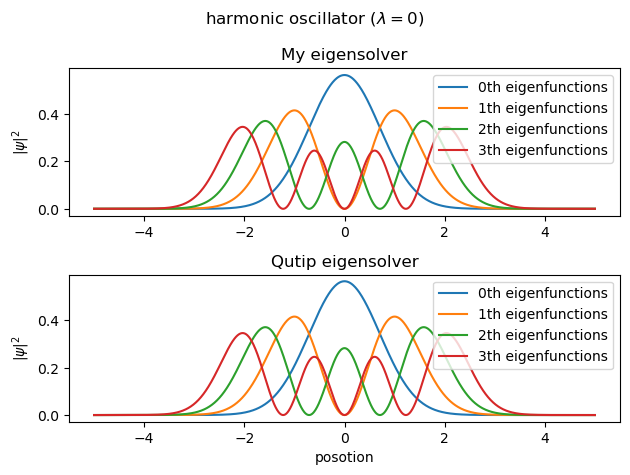

In [16]:
# Parameters
omega = 1.0  
h_bar = 1
N = 10    
lamb = 0
m = 1

# Operators
a = qt.destroy(N)        
a_dag = a.dag()          

# x^4 operator
x4 = qt.Qobj(create_x4_matrix(N))

# Hamiltonian
store = []


H = omega * h_bar * (a_dag * a + 0.5)
H_aharmonic = H + lamb*x4
H_aharmonic_np = H_aharmonic.full()

d, U = hermitian_eigensystem(H_aharmonic_np, 1e-8)
d_qutip, U_qutip = H_aharmonic.eigenstates()
U_list = [U.full() for U in U_qutip]
U_qutip = np.hstack(U_list)

fig, ax = plt.subplots(nrows = 2, ncols = 1)

x = np.linspace(-5, 5, 1000)
for i in range(4):
    y = np.polynomial.hermite.hermval(x, U[:,i]) * np.exp(-x**2/2) * (2**i * math.factorial(i) * np.sqrt(np.pi))**(-0.5)
    norm_const = simpson(np.abs(y)**2, dx=x[1]-x[0])
    ax[0].plot(x, np.abs(y)**2/norm_const, label = '{}th eigenfunctions'.format(i))

ax[0].legend()
ax[0].set_title('My eigensolver')
ax[0].set_ylabel(r'|$\psi|^2$')

for i in range(4):
    y = np.polynomial.hermite.hermval(x, U_qutip[:,i]) * np.exp(-x**2/2) * (2**i * math.factorial(i) * np.sqrt(np.pi))**(-0.5)
    norm_const = simpson(np.abs(y)**2, dx=x[1]-x[0])
    ax[1].plot(x, np.abs(y)**2/norm_const, label = '{}th eigenfunctions'.format(i))
ax[1].legend()
ax[1].set_title('Qutip eigensolver')
ax[1].set_xlabel('posotion')
ax[1].set_ylabel(r'|$\psi|^2$')

fig.suptitle(r'harmonic oscillator ($\lambda = 0$)') 
plt.tight_layout()
plt.plot()